<h1>Loading the dataset and cleaning </h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
path=r'autos.csv'
data = pd.read_csv(path, sep=',',encoding='Latin1')

<h3> 1. Remove records with no pictures. <br> 
2. Remove non private sellers <br> 
3. Remove all angebot records <br>
4. Remove petitions Gesuch records <br>
5. Remove abtest records <br>
6. Remove records listed for 100K a car <br>
7. Remove records before 18th century and after 2017
8. Remove na records</h3>

In [2]:
work_data=data.drop('nrOfPictures',1)
print(data.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


In [3]:
work_data = work_data[work_data.seller != 'gewerblich']
work_data=work_data.drop('seller',1)
print(work_data.groupby('offerType').size())

offerType
Angebot    371513
Gesuch         12
dtype: int64


In [4]:
work_data = work_data[work_data.offerType != 'Gesuch']
work_data=work_data.drop('offerType',1)
#inspecting: name
print(len(work_data.groupby('name').size()), 'different names for all offers')

233517 different names for all offers


In [5]:
work_data=work_data.drop('name',1)
work_data=work_data.drop('abtest',1)

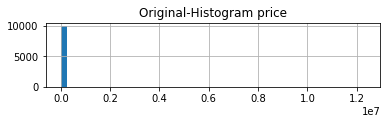

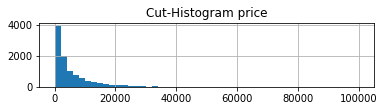

10772 cars with price 0


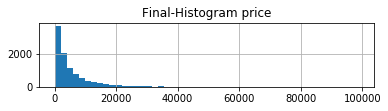

In [6]:
sample_data=work_data.sample(n=10000, random_state=1)
#inspecting: price
plt.subplot(3,1,1)
sample_data['price'].hist(bins=50)
plt.title('Original-Histogram price')
plt.show()
#There are kinda expensive cars on sale. The owners are slightly overestimating the value I guess.

#I'll' cut the price at 100000
work_data = work_data[work_data.price < 100000]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_data['price'].hist(bins=50)
plt.title('Cut-Histogram price')
plt.show()



print(len(work_data[work_data.price == 0]), 'cars with price 0')
work_data = work_data[work_data.price != 0]
sample_data=work_data.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_data['price'].hist(bins=50)
plt.title('Final-Histogram price')
plt.show()


In [7]:
work_data = work_data[(work_data.yearOfRegistration >= 1863) & (work_data.yearOfRegistration <= 2017)]
print(work_data['powerPS'].describe())

count    356355.000000
mean        116.572558
std         186.866013
min           0.000000
25%          73.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64


In [8]:
#remove data with engine power > 1000
work_data = work_data[(work_data.powerPS > 0) & (work_data.powerPS < 1000)]

count    320213.000000
mean        126.058011
std          62.167403
min           1.000000
25%          80.000000
50%         116.000000
75%         150.000000
max         999.000000
Name: powerPS, dtype: float64


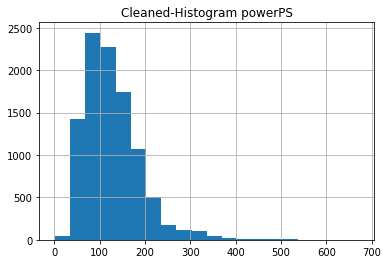

In [9]:
cleaned_data = work_data
column_name_you_want_to_inspect='powerPS'
print(cleaned_data[column_name_you_want_to_inspect].describe())

sample_data=cleaned_data.sample(n=10000, random_state=1)
sample_data[column_name_you_want_to_inspect].hist(bins=20)
plt.title('Cleaned-Histogram ' + column_name_you_want_to_inspect)
plt.show()

In [10]:
#Drop NA 
superclean_data = cleaned_data.dropna()
superclean_data.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34


In [11]:
superclean_data.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,96224,2016-04-06 10:45:34


<h3> Create numerical feature of how old the car is </h3>

In [12]:
pd.options.mode.chained_assignment = None  # default='warn'
import math
superclean_data['date_crawled']= pd.to_datetime(superclean_data['dateCrawled'])
superclean_data['year_registered'] = superclean_data['yearOfRegistration'].apply(lambda x: str(x))
superclean_data['month_registered'] = superclean_data['monthOfRegistration'].apply(lambda x: str(x))
superclean_data['date_crawled_year']= superclean_data['dateCrawled'].apply(lambda x: int(x.split('-')[0]))

superclean_data['yearsOld'] =  superclean_data['date_crawled_year'] - superclean_data['yearOfRegistration'] ;
#superclean_data['registration'] = superclean_data['year_registered'] +"-" + superclean_data['month_registered'] + "-01" 

<h3> Create the label based on price 8000 euros. If price is less than 8000 mark it has less expensive </h3>

In [13]:
superclean_data['less_expensive']  = superclean_data['price'].apply(lambda x: 1 if (x <= 8000)  else 0)


<h3> Creating categorical variables using One-hot-encoding </h3>

In [14]:
superclean_data['gearbox_category'] = superclean_data['gearbox'].apply(lambda x: 0 if (x == 'manuell') else 1)
data = superclean_data;
# there are 7 unique fuel types, we can create a categorical variable for each one of them
#array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
data['benzin'] = data['fuelType'].apply(lambda x : 1 if (x == 'benzin') else 0)
data['diesel'] = data['fuelType'].apply(lambda x : 1 if (x == 'diesel') else 0)
data['lpg'] = data['fuelType'].apply(lambda x : 1 if (x == 'lpg') else 0)
data['andere'] = data['fuelType'].apply(lambda x : 1 if (x == 'andere') else 0)
data['hybrid'] = data['fuelType'].apply(lambda x : 1 if (x == 'hybrid') else 0)
data['cng'] = data['fuelType'].apply(lambda x : 1 if (x == 'cng') else 0)
data['elektro'] = data['fuelType'].apply(lambda x : 1 if (x == 'elektro') else 0)

In [15]:
# there are 8 unique vehicle types. We can create a categorical variable for each one of them
data['kleinwagen'] = data['vehicleType'].apply(lambda x : 1 if (x == 'kleinwagen') else 0)
data['cabrio'] = data['vehicleType'].apply(lambda x : 1 if (x == 'cabrio') else 0)
data['limousine'] = data['vehicleType'].apply(lambda x : 1 if (x == 'limousine') else 0)
data['kombi'] = data['vehicleType'].apply(lambda x : 1 if (x == 'kombi') else 0)
data['suv'] = data['vehicleType'].apply(lambda x : 1 if (x == 'suv') else 0)
data['bus'] = data['vehicleType'].apply(lambda x : 1 if (x == 'bus') else 0)
data['coupe'] = data['vehicleType'].apply(lambda x : 1 if (x == 'coupe') else 0)

In [16]:
# there are 35+ models, we take top models only
data['golf'] = data['model'].apply(lambda x : 1 if (x == 'golf') else 0)
data['fabia'] = data['model'].apply(lambda x : 1 if (x == 'fabia') else 0)
data['3er'] = data['model'].apply(lambda x : 1 if (x == '3er') else 0)
data['polo'] = data['model'].apply(lambda x : 1 if (x == 'polo') else 0)
data['corsa'] = data['model'].apply(lambda x : 1 if (x == 'corsa') else 0)
data['a4'] = data['model'].apply(lambda x : 1 if (x == 'a4') else 0)
data['passat'] = data['model'].apply(lambda x : 1 if (x == 'passat') else 0)
data['astra'] = data['model'].apply(lambda x : 1 if (x == 'astra') else 0)
data['5er'] = data['model'].apply(lambda x : 1 if (x == '5er') else 0)
data['c_klasse'] = data['model'].apply(lambda x : 1 if (x == 'c_klasse') else 0)

In [30]:
data['volkswagen'] = data['brand'].apply(lambda x : 1 if (x == 'volkswagen') else 0)
data['bmw'] = data['brand'].apply(lambda x : 1 if (x == 'bmw') else 0)
data['mercedes_benz'] = data['brand'].apply(lambda x : 1 if (x == 'mercedes_benz') else 0)
data['skoda'] = data['brand'].apply(lambda x : 1 if (x == 'skoda') else 0)

data['opel'] = data['brand'].apply(lambda x : 1 if (x == 'opel') else 0)
data['audi'] = data['brand'].apply(lambda x : 1 if (x == 'audi') else 0)

data['ford'] = data['brand'].apply(lambda x : 1 if (x == 'ford') else 0)
data['renault'] = data['brand'].apply(lambda x : 1 if (x == 'renault') else 0)
data['porsche'] = data['brand'].apply(lambda x : 1 if (x == 'porsche') else 0)
data['jaguar'] = data['brand'].apply(lambda x : 1 if (x == 'jaguar') else 0)


data['repaired'] = data['notRepairedDamage'].apply(lambda x : 0 if (x=='nein') else 1)
data['peugeot'] = data['brand'].apply(lambda x : 1 if (x == 'peugeot') else 0)
data['fiat'] = data['brand'].apply(lambda x : 1 if (x == 'fiat') else 0)
data['seat'] = data['brand'].apply(lambda x : 1 if (x == 'seat') else 0)
data['toyota'] = data['brand'].apply(lambda x : 1 if (x == 'toyota') else 0)
data['nissan'] = data['brand'].apply(lambda x : 1 if (x == 'nissan') else 0)
data['kia'] = data['brand'].apply(lambda x : 1 if (x == 'kia') else 0)


In [31]:


data['oldandheavilyUsed'] = data['yearsOld'] * data['kilometer']

data['oldandheavilyUsedAndDamaged'] = data['yearsOld'] * data['kilometer'] * data['repaired']

#pd.Series(superclean_data['brand'],name='A').unique()


<h3> Feature scaling or feature normalization for Logistic Regression </h3>

In [36]:
#feature scaling 

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data.dtypes
label_field = ['less_expensive']
Y = data[label_field]
training_fields = ['less_expensive','powerPS', 'kilometer', 'yearsOld', 'repaired']
training_fields = ['less_expensive','oldandheavilyUsedAndDamaged','peugeot', 'kia','fiat','seat','toyota','nissan','skoda','jaguar','porsche','oldandheavilyUsed','powerPS', 'kilometer', 'yearsOld', 'gearbox_category',"benzin","diesel","lpg","andere","hybrid","cng","elektro","kleinwagen","cabrio","limousine","kombi","suv","bus","coupe","golf","fabia","3er","polo","corsa","a4","passat","astra","5er","c_klasse","volkswagen","bmw","mercedes_benz","opel","audi","ford","renault","repaired"]
#training_fields = ['less_expensive','powerPS', 'kilometer', 'yearsOld', 'repaired']

X = data[training_fields]
scaled_X = scaler.fit_transform(X)
Y_label = scaler.fit_transform(Y)
Y_label = pd.DataFrame(Y_label, columns=label_field)
scaled_X = pd.DataFrame(scaled_X, columns=training_fields)
data.head()


,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,...,jaguar,repaired,peugeot,fiat,seat,toyota,nissan,kia,oldandheavilyUsed,oldandheavilyUsedAndDamaged
3,2016-03-17 16:54:04,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,...,0,0,0,0,0,0,0,0,2250000,0
4,2016-03-31 17:25:20,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,...,0,0,0,0,0,0,0,0,720000,0
5,2016-04-04 17:36:23,650,limousine,1995,manuell,102,3er,150000,10,benzin,...,0,1,0,0,0,0,0,0,3150000,3150000
6,2016-04-01 20:48:51,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,...,0,0,1,0,0,0,0,0,1800000,0
10,2016-03-26 19:54:18,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,...,0,0,0,0,0,0,0,0,1800000,0


In [37]:
Y = scaled_X.less_expensive;
X_all= scaled_X[training_fields[1:]]
training_fields[1:]
len(training_fields[1:])

4

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)
lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(X_train, y_train)
print (model)
predictions = lm.predict(X_test)

print ("Score:", model.score(X_test, y_test))


[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)
Score: 0.8930329191544296


In [39]:
predictions = lm.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)


True positives: 67892.0
False positives: 6927.0
True Negatives: 20656.0
False Negatives: 3681.0
precision: 0.9074165653109504
recall: 0.9485699914772331
f1score: 0.9275370238810864
